In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
#from sklearn import tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#, confusion_matrix, ConfusionMatrixDisplay
from pickle import load, dump
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

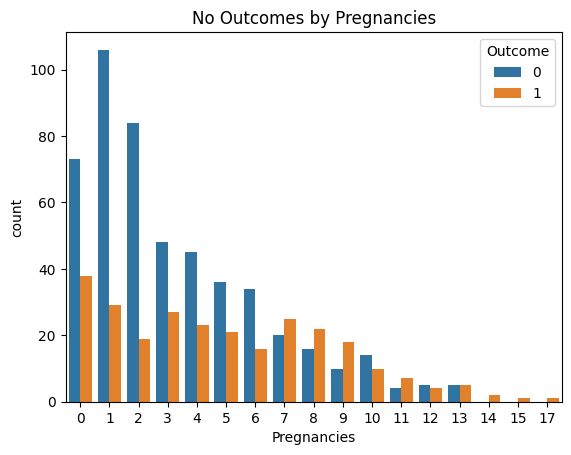

In [6]:
sns.countplot(x='Pregnancies', hue='Outcome', data=data)

# Customize the plot (optional)
plt.title('No Outcomes by Pregnancies')
plt.legend(title='Outcome')
plt.show()

In [7]:
num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# We divide the dataset into training and test samples
X = data.drop("Outcome", axis = 1)[num_variables]
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [8]:
num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# We divide the dataset into training and test samples
X = data.drop("Outcome", axis = 1)[num_variables]
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


<Axes: >

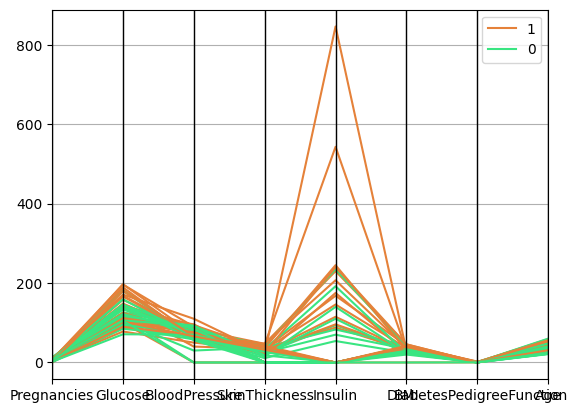

In [9]:
pd.plotting.parallel_coordinates(data.head(50),class_column="Outcome", color = ("#E58139", "#39E581", "#8139E5"))

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

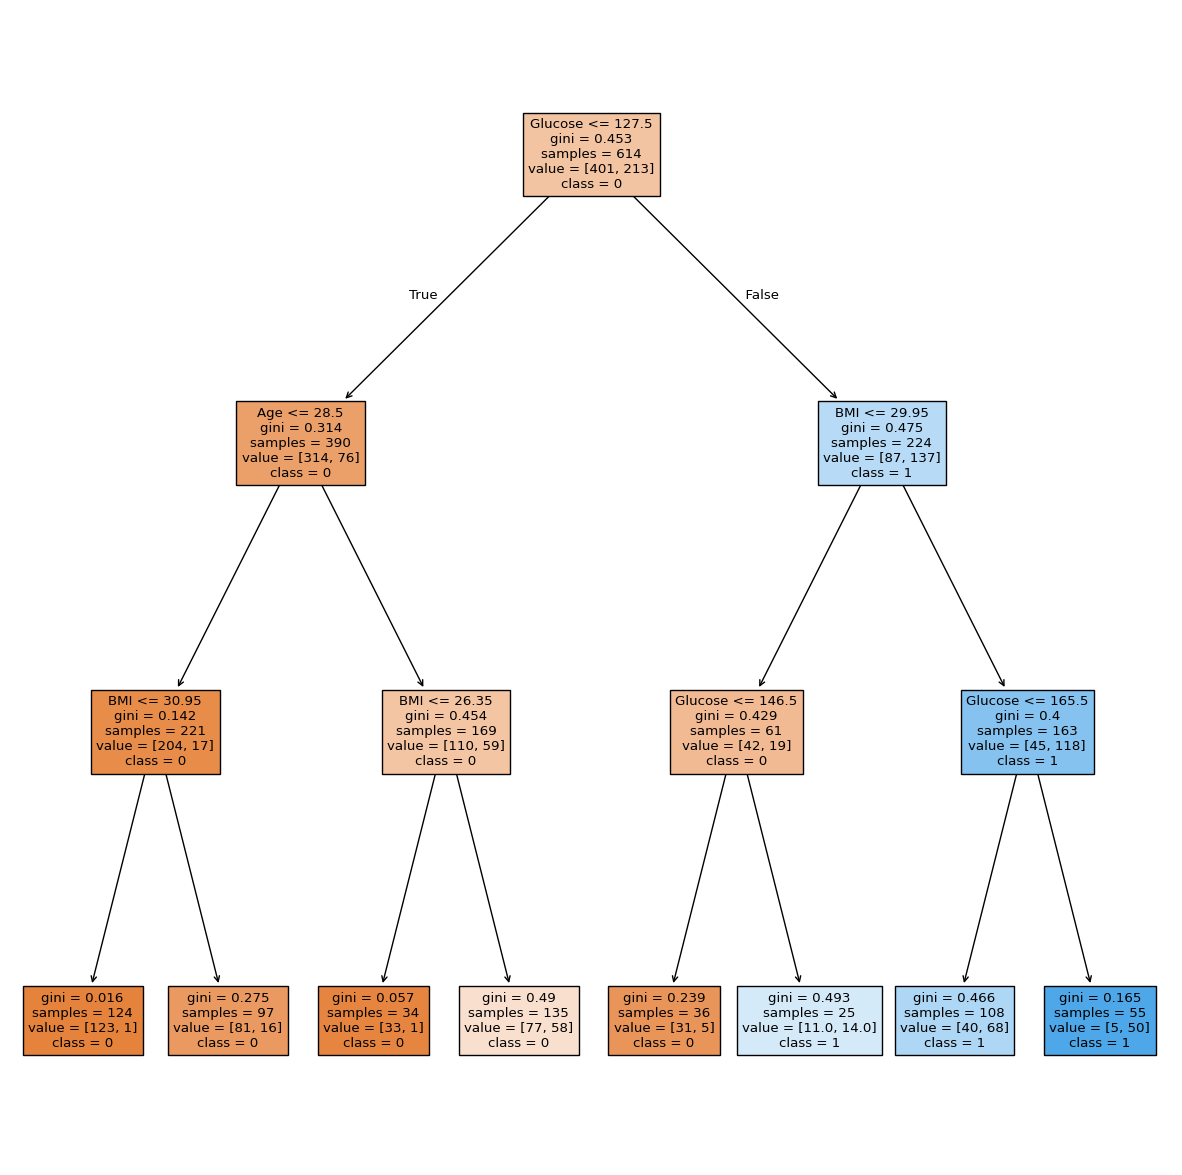

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

In [14]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)  # Increase max_iter as needed  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  

base_accuracy = accuracy_score(y_test, y_pred)  
print(base_accuracy) 

0.7467532467532467


In [17]:
from sklearn.preprocessing import StandardScaler  

# Scale the features  
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# Fit the model on the scaled data  
model = LogisticRegression(max_iter=200)  # Increase max_iter as needed  
model.fit(X_train_scaled, y_train)  
y_pred = model.predict(X_test_scaled)  

base_accuracy = accuracy_score(y_test, y_pred)  
print(base_accuracy)  

0.7532467532467533


In [18]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [20]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7532467532467533

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

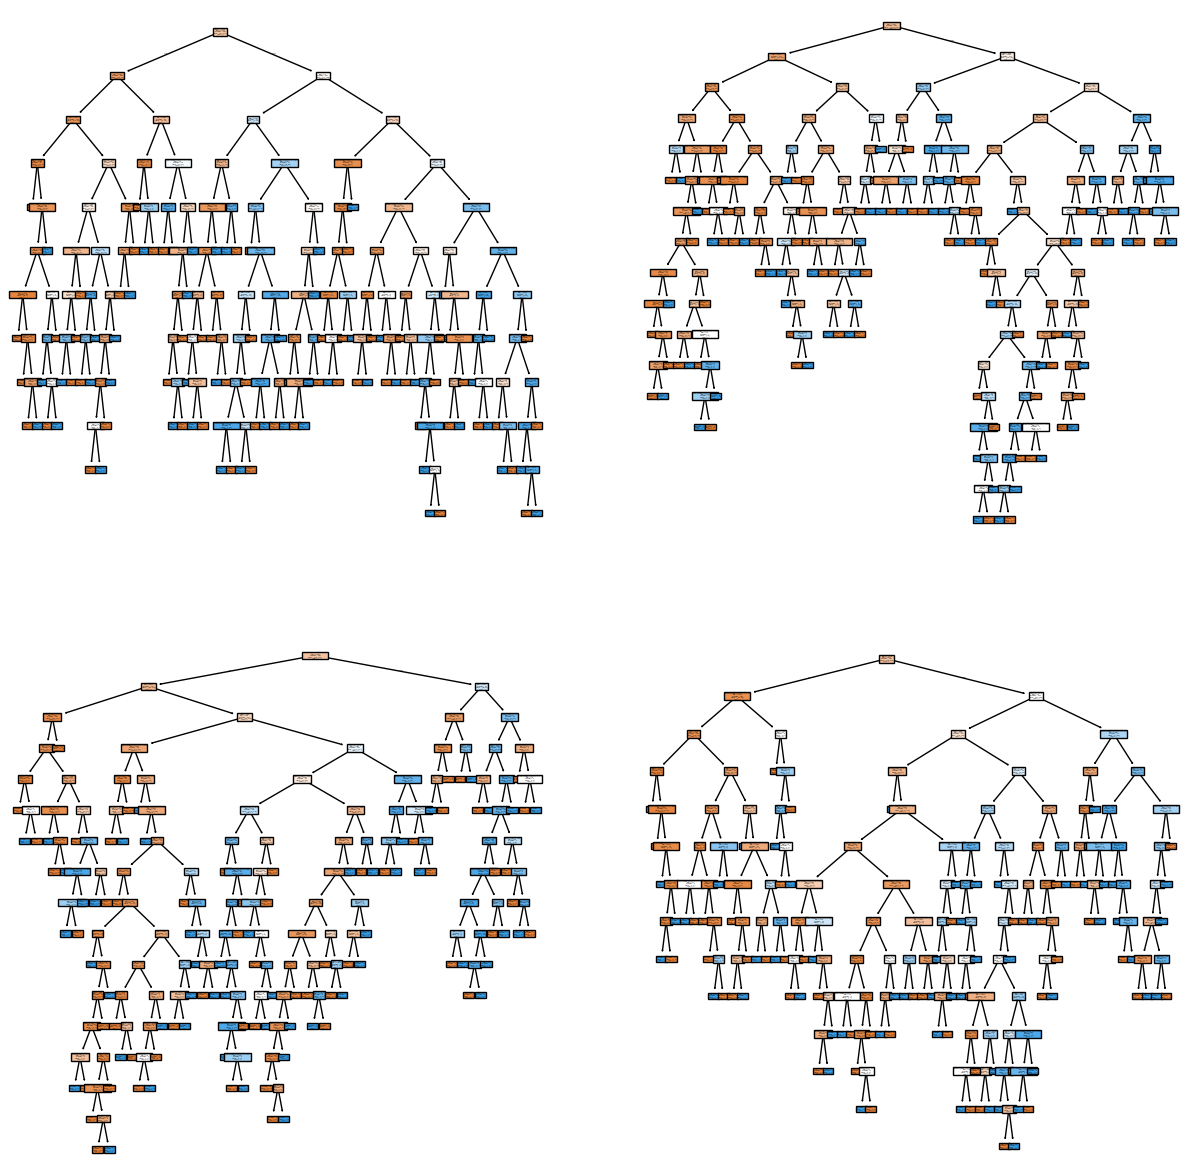

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7207792207792207

In [25]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0.5 , 0.33, 0.06, 0.09, 0.43, 0.63, 0.05, 0.84, 0.55, 0.7 , 0.27,
       0.89, 0.35, 0.6 , 0.02, 0.4 , 0.03, 0.01, 0.58, 0.62, 0.33, 0.03,
       0.2 , 0.02, 0.56, 0.97, 0.01, 0.01, 0.1 , 0.07, 0.68, 0.84, 0.84,
       0.85, 0.6 , 0.61, 0.9 , 0.6 , 0.2 , 0.78, 0.06, 0.4 , 0.73, 0.49,
       0.02, 0.73, 0.42, 0.1 , 0.02, 0.94, 0.  , 0.86, 0.66, 0.21, 0.13,
       0.08, 0.54, 0.02, 0.34, 0.77, 0.65, 0.15, 0.24, 0.43, 0.01, 0.74,
       0.01, 0.55, 0.02, 0.69, 0.63, 0.12, 0.03, 0.  , 0.09, 0.41, 0.07,
       0.06, 0.06, 0.16, 0.7 , 0.11, 0.12, 0.66, 0.34, 0.94, 0.58, 0.51,
       0.39, 0.04, 0.04, 0.1 , 0.02, 0.55, 0.39, 0.69, 0.72, 0.05, 0.75,
       0.04, 0.86, 0.01, 0.48, 0.68, 0.88, 0.12, 0.22, 1.  , 0.26, 0.81,
       0.01, 0.81, 0.2 , 0.84, 0.3 , 0.42, 0.83, 0.37, 0.03, 0.68, 0.  ,
       0.34, 0.44, 0.03, 0.22, 0.53, 0.3 , 0.75, 0.72, 0.72, 0.68, 0.61,
       0.06, 0.42, 0.92, 0.42, 0.31, 0.68, 0.84, 0.  , 0.04, 0.  , 0.17,
       0.48, 0.12, 0.19, 0.19, 0.01, 0.45, 0.77, 0.

In [28]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.17119610389610387


In [29]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))